In [1]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import re
import os 
import pandas as pd
import numpy as np
import statistics as stat
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import math
from itertools import product
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score,roc_curve, auc
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# Time Series Classification

## a) Download

Cleaning the data using excel:Bending2_dataset4 is slightly different in its format. Excel/data/text_to_columns was used to spread the data in the first column into the seven columns, so that it is formatly same to the rest datasets.

In [2]:
path = '../data/AReM/'

folders = os.listdir(path)
folders = folders [1:]
df = dict()
#print (type(df_index))
for folder in folders:
    folder_path = path+folder+'/'
    files = os.listdir (folder_path)
    for file in files:
        file_path = folder_path + file
        #print (file_path)
        file_name = folder +'_' +file [:-4]
        #print (file_name)
        df [file_name] = pd.read_csv(file_path, delimiter =',', skiprows = 4, usecols = [0,1,2,3,4,5,6])
        #print(df[file_name].isnull().sum())
for key, dataset in df.items():
    dataset.set_index(['# Columns: time'], inplace=True)
df ['standing_dataset6']



,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,44.50,0.87,11.25,5.54,12.50,2.96
250,42.50,0.87,18.00,0.71,14.25,3.83
500,39.00,2.12,16.00,1.58,13.75,2.38
750,36.25,0.43,18.67,0.47,9.50,0.50
1000,39.25,1.48,16.25,2.68,5.67,2.87
...,...,...,...,...,...,...
118750,45.00,0.00,21.00,0.00,13.00,0.82
119000,45.00,0.00,21.00,0.00,12.25,0.43
119250,45.00,0.00,21.00,0.00,12.50,0.87


## b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [3]:
test = dict()
train = dict()

#test_set = 
for key, dataset in df.items():
    if ((key == 'bending1_dataset1') or (key =='bending1_dataset2') or (key=='bending2_dataset1') or (key=='bending2_dataset2')\
               or (key=='walking_dataset1') or (key=='walking_dataset2') or (key=='walking_dataset3')\
               or (key=='standing_dataset1') or (key=='standing_dataset2') or (key=='standing_dataset3')\
               or (key=='sitting_dataset1') or (key=='sitting_dataset2')or (key=='sitting_dataset3')\
               or (key=='lying_dataset1') or (key=='lying_dataset2' )or (key=='lying_dataset3')\
               or (key=='cycling_dataset1' )or (key=='cycling_dataset2')or (key=='cycling_dataset3')):
        test[key] = dataset
    else:
        train[key] = dataset
        
print (test.keys())
print ('')
print (train.keys())

dict_keys(['bending1_dataset1', 'bending1_dataset2', 'walking_dataset1', 'walking_dataset2', 'walking_dataset3', 'bending2_dataset1', 'bending2_dataset2', 'standing_dataset1', 'standing_dataset2', 'standing_dataset3', 'sitting_dataset1', 'sitting_dataset2', 'sitting_dataset3', 'lying_dataset1', 'lying_dataset2', 'lying_dataset3', 'cycling_dataset1', 'cycling_dataset2', 'cycling_dataset3'])

dict_keys(['bending1_dataset7', 'bending1_dataset6', 'bending1_dataset4', 'bending1_dataset5', 'bending1_dataset3', 'walking_dataset7', 'walking_dataset6', 'walking_dataset4', 'walking_dataset5', 'walking_dataset10', 'walking_dataset11', 'walking_dataset13', 'walking_dataset12', 'walking_dataset15', 'walking_dataset14', 'walking_dataset8', 'walking_dataset9', 'bending2_dataset6', 'bending2_dataset4', 'bending2_dataset5', 'bending2_dataset3', 'standing_dataset7', 'standing_dataset6', 'standing_dataset4', 'standing_dataset5', 'standing_dataset10', 'standing_dataset11', 'standing_dataset13', 'standing_

## c) Feature Extraction (on time-domain features)

### i) Research what types of time-domain features are usually used

Means, standard deviations, maximum, minimum, median, first quartile, thrid quartile, skewness, kurtosis, d*(d-1) cross-correlations and d auto-correlations

### ii) Feature Table

In [4]:
# function to get features
#def get_feature(dataset, )

In [5]:
#features
feature_dict = {}
for key, dataset in df.items():
    feature_list = [key]
    for i in range(0,dataset.shape[1]):
        column = dataset.iloc[:,i]
        feature_list.append (column.min())
        feature_list.append (column.max())
        feature_list.append (column.mean())
        feature_list.append (column.median())
        feature_list.append (column.std())
        feature_list.append (column.quantile(0.25))
        feature_list.append (column.quantile(0.75))
        #print (len(feature_list))
    #instance_num+=1
    feature_dict [key]= feature_list
    
#name_list

name_list = ['key']
for i in range (1,7):
    i = str(i)
    name_list.append ('min_'+i)
    name_list.append ('max_'+i)
    name_list.append ('mean_'+i)
    name_list.append ('median_'+i)
    name_list.append ('standard deviation_'+i)
    name_list.append ('1st quart_'+i)
    name_list.append ('3rd quart_'+i)
    #print (len (name_list))

# put them together as a df
feature_df = pd.DataFrame.from_dict(feature_dict, orient='index', columns = name_list)
#feature_df.sort_values(by = 'key')

i = range(1,89)
feature_df.insert(0,'instance',i)

feature_df.set_index(['instance'], inplace=True)
feature_df

,key,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
instance,,,,,,,,,,,,,,,,,,,,,
1,bending1_dataset7,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.8300
2,bending1_dataset6,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
3,bending1_dataset4,33.00,47.75,42.179812,43.50,3.670666,39.1500,45.00,0.0,3.00,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,bending1_dataset5,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,bending1_dataset1,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,cycling_dataset12,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
85,cycling_dataset15,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
86,cycling_dataset14,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175


### iii) Estimate the standard deviation of each features and find the 90% bootsrap CI

In [6]:
#Estimate the STD
feature_std_list = []
for i in range (1, feature_df.shape[1]):
    column = feature_df.iloc[:,i]
    feature_std = column.std()
    feature_std_list.append (feature_std)
#print (len(feature_std_list), feature_std_list)

std_name_list = name_list[1:]
#print (len(std_name_list), std_name_list)

feature_std_df = pd.DataFrame ([feature_std_list], columns = std_name_list)

feature_std_df


,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,mean_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
0,9.569975,4.394362,5.335703,5.440054,1.772155,6.15359,5.138925,0.0,5.062729,1.57417,...,1.02487,6.096465,5.53172,0.045838,2.518921,1.154752,1.086474,0.517503,0.758584,1.523599


In [7]:
# https://stackoverflow.com/questions/40491298/how-to-calculate-95-confidence-intervals-using-bootstrap-method

In [8]:
# 90% bootsrap confidence interval
std_CI_list = []
for i in range (1, feature_df.shape[1]):
    column = feature_df.iloc[:,i]
    std_list = []
    for i in range (1,1001):
        sample = column.sample(88)
        std_list.append(sample.std())
    #std_list.sort()
    #print (std_list)
    lower= np.percentile(std_list, 10)
    upper= np.percentile(std_list, 90)
    #print (lower) min, mean, and max
    std_CI_list.append ((lower,upper))
std_CI_df = pd.DataFrame ([std_CI_list], columns = std_name_list)
std_CI_df

,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,mean_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
0,"(9.569975284512807, 9.569975284512807)","(4.39436168470319, 4.39436168470319)","(5.335703257246117, 5.335703257246117)","(5.440054137152637, 5.440054137152637)","(1.772155325516896, 1.772155325516896)","(6.1535897241853705, 6.153589724185371)","(5.138924613450999, 5.138924613451)","(0.0, 0.0)","(5.0627293748106394, 5.06272937481064)","(1.5741696585401823, 1.5741696585401823)",...,"(1.0248704473121486, 1.0248704473121486)","(6.09646520156495, 6.096465201564951)","(5.531720219299494, 5.531720219299494)","(0.04583815401645624, 0.045838154016456245)","(2.5189209776905526, 2.5189209776905526)","(1.154751756920266, 1.154751756920266)","(1.0864743253475888, 1.0864743253475888)","(0.5175029876432582, 0.5175029876432582)","(0.7585838153286205, 0.7585838153286205)","(1.5235991261756407, 1.5235991261756407)"


### iv.  Select the three most important time-domain features

min, mean, and max

## d. Binary Classification Using Logistic Regression

### i. Classify bending from other activities, scatter plot

In [9]:
train_bending= {}
train_not_bending={}

for key, dataset in train.items():
    if 'bending'in key:
        train_bending[key]=dataset
    else:
        train_not_bending [key] = dataset

#print (len(train_bending.keys()))
#print (len(train_not_bending.keys()))

In [10]:
#pd.set_option('display.max_rows', None)
feature_df

,key,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
instance,,,,,,,,,,,,,,,,,,,,,
1,bending1_dataset7,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.8300
2,bending1_dataset6,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
3,bending1_dataset4,33.00,47.75,42.179812,43.50,3.670666,39.1500,45.00,0.0,3.00,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,bending1_dataset5,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,bending1_dataset1,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,cycling_dataset12,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
85,cycling_dataset15,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
86,cycling_dataset14,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175


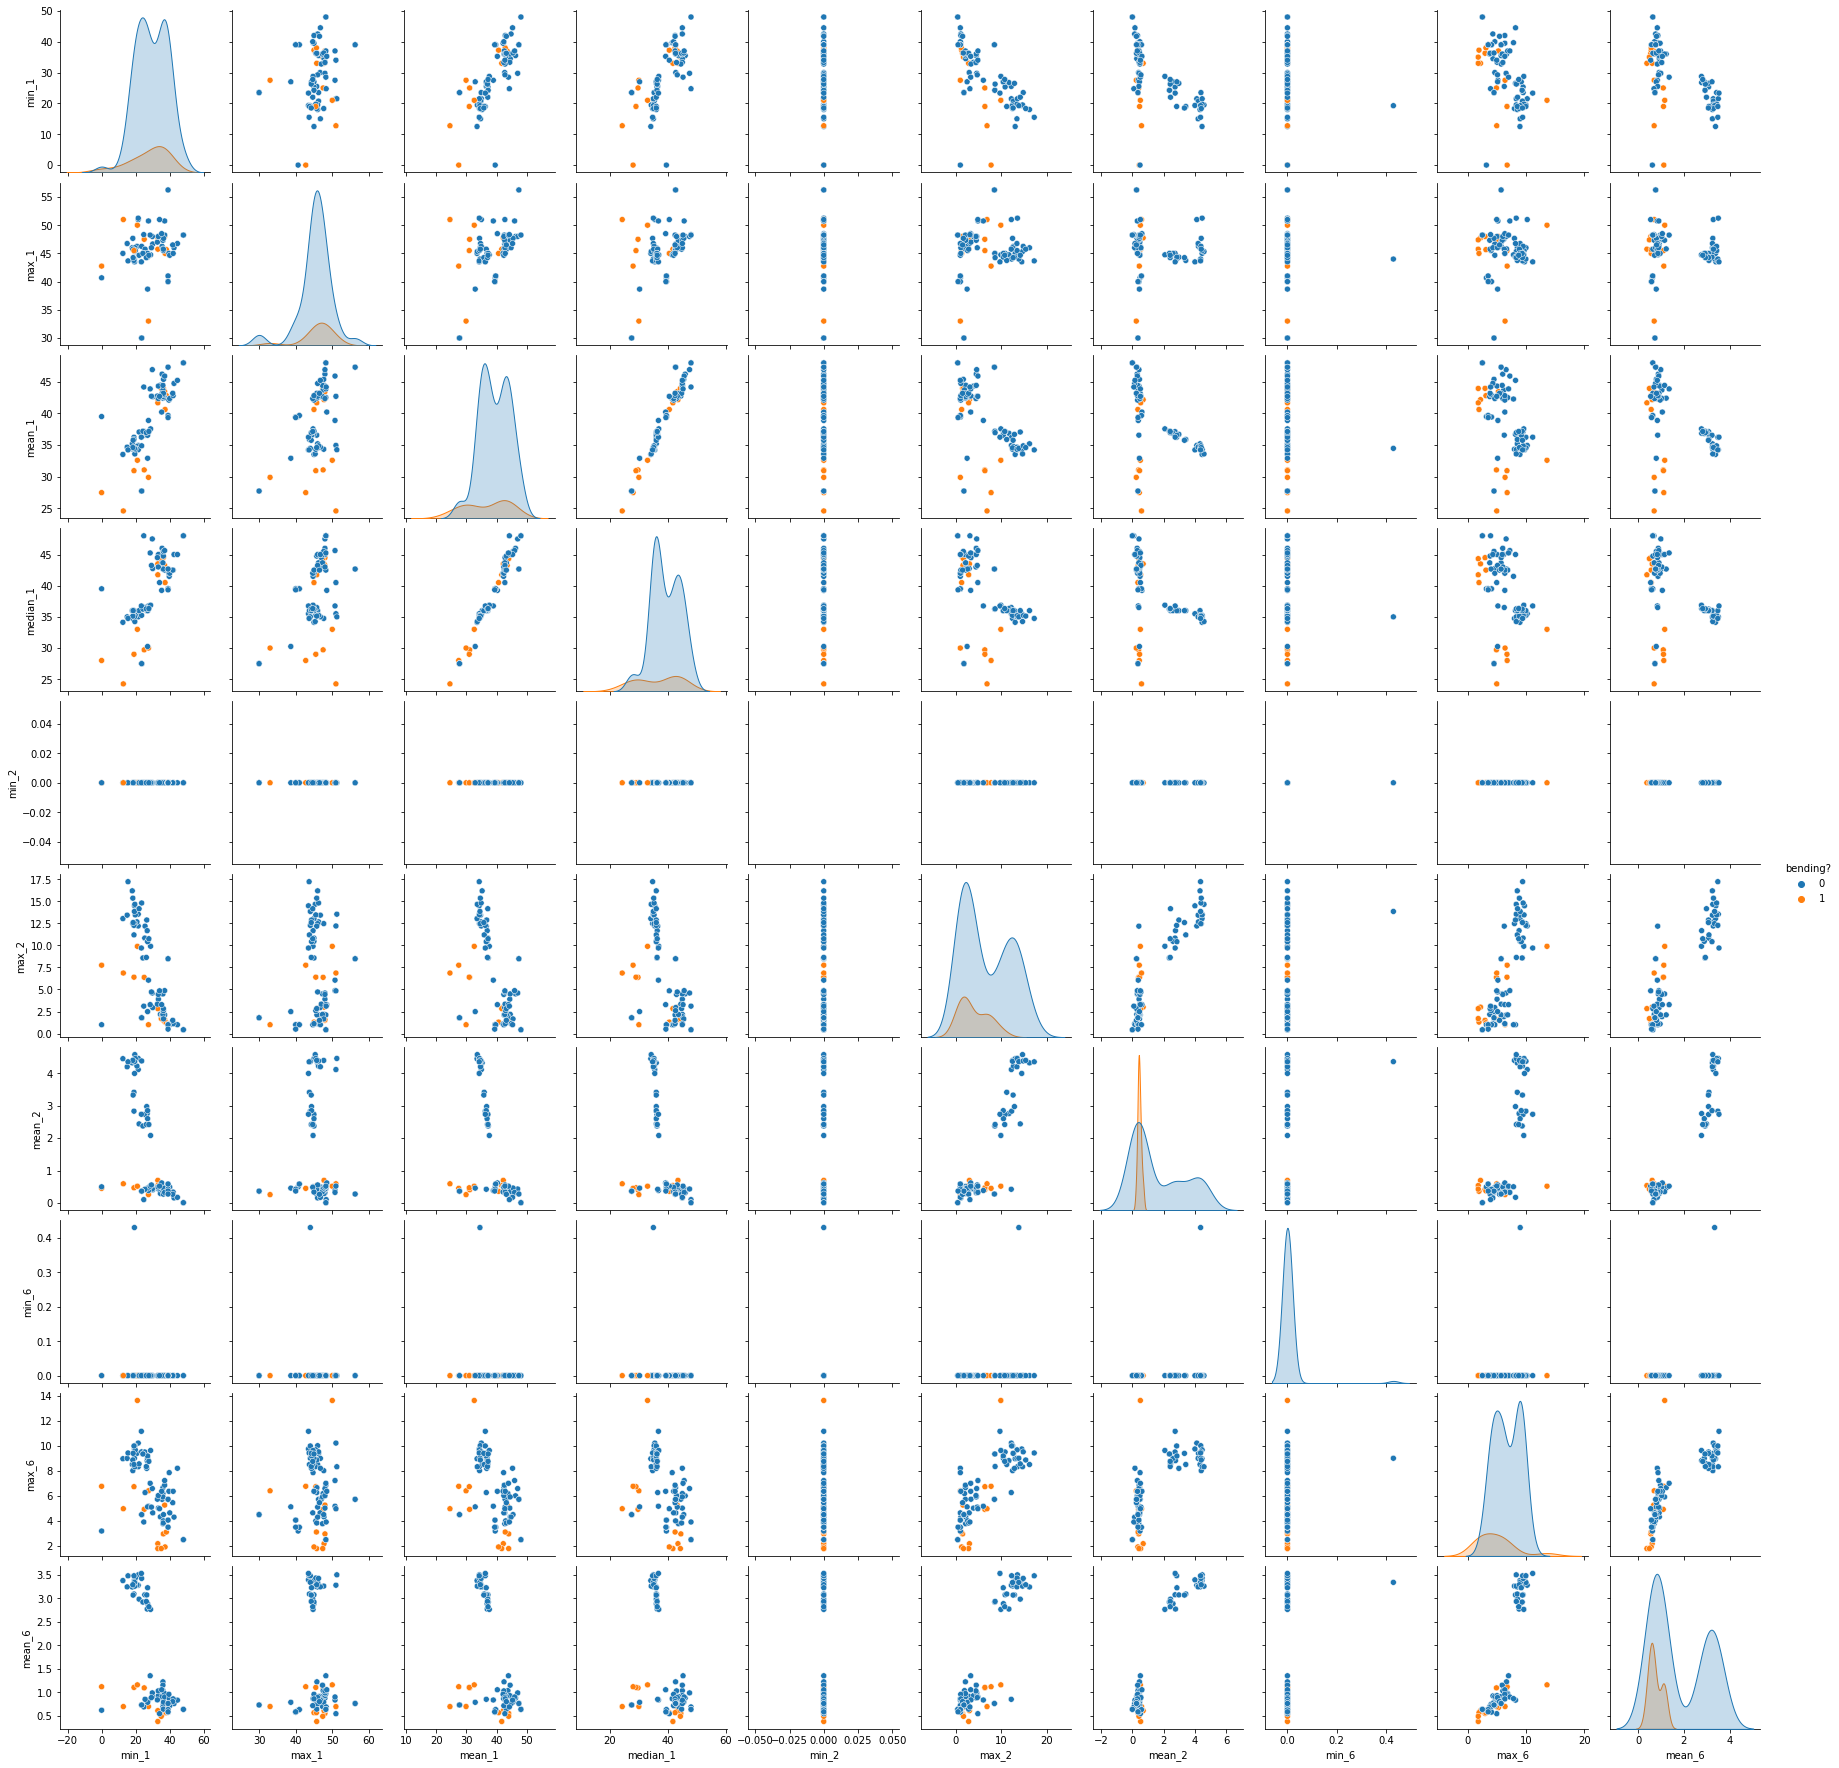

In [11]:
train_feature_used = feature_df.iloc[:,[0,1,2,3,4,8,9,10,36,37,38]]
y_list = []
for key in train_feature_used['key']:
    if 'bending' in key:
        y_list.append(1)
    else:
        y_list.append(0)

train_feature_used.insert(train_feature_used.shape[1], 'bending?',y_list)
train_feature_used.drop([5,6,12,13,14,26,27,33,34,35,48,49,50,63,64,65,78,79,80])
#print (train_feature_used.shape[0])

sns.pairplot(train_feature_used, hue = 'bending?')

In [12]:
train['standing_dataset6']

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,44.50,0.87,11.25,5.54,12.50,2.96
250,42.50,0.87,18.00,0.71,14.25,3.83
500,39.00,2.12,16.00,1.58,13.75,2.38
750,36.25,0.43,18.67,0.47,9.50,0.50
1000,39.25,1.48,16.25,2.68,5.67,2.87
...,...,...,...,...,...,...
118750,45.00,0.00,21.00,0.00,13.00,0.82
119000,45.00,0.00,21.00,0.00,12.25,0.43
119250,45.00,0.00,21.00,0.00,12.50,0.87


### ii)Break each time series in your training set into two time series

In [13]:
#break datasets in train set
df_12col = {}
for key, dataset in train.items():
    df_12col_dataset = {}
    for i in dataset.columns.tolist():
        df_12col_dataset[i+'_1']=list(dataset[i][:240])
        df_12col_dataset[i+'_2']=list(dataset[i][240:])
        #print (len(df_12col_dataset[i+'_1']))
        #print (len(df_12col_dataset[i+'_2']))
    df_ = pd.DataFrame()
    for list_key, datalist in df_12col_dataset.items():
        df_[list_key] = datalist
    df_12col[key]=df_
df_12col['standing_dataset6']
    

,avg_rss12_1,avg_rss12_2,var_rss12_1,var_rss12_2,avg_rss13_1,avg_rss13_2,var_rss13_1,var_rss13_2,avg_rss23_1,avg_rss23_2,var_rss23_1,var_rss23_2
0,44.50,45.0,0.87,0.0,11.25,19.67,5.54,0.47,12.50,13.00,2.96,0.82
1,42.50,45.0,0.87,0.0,18.00,19.00,0.71,0.00,14.25,15.00,3.83,0.82
2,39.00,45.0,2.12,0.0,16.00,18.75,1.58,0.43,13.75,14.67,2.38,0.47
3,36.25,45.0,0.43,0.0,18.67,18.50,0.47,0.50,9.50,14.75,0.50,0.43
4,39.25,45.0,1.48,0.0,16.25,18.50,2.68,0.50,5.67,15.00,2.87,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...
235,45.00,45.0,0.00,0.0,20.00,21.00,0.00,0.00,12.25,13.00,0.43,0.82
236,45.00,45.0,0.00,0.0,20.25,21.00,0.43,0.00,12.00,12.25,0.00,0.43
237,45.00,45.0,0.00,0.0,20.00,21.00,0.00,0.00,12.75,12.50,0.83,0.87
238,45.00,45.0,0.00,0.0,20.25,21.00,0.43,0.00,13.50,12.00,1.66,0.00


In [14]:
#get features 

feature_dict_12col = {}

for key, dataset in df_12col.items():
    feature_list_12col = [key]
    dataset_col = list(dataset.columns)
    for i in list(dataset.columns):
        column = dataset.loc[:,i]
        feature_list_12col.append (column.min())
        feature_list_12col.append (column.max())
        feature_list_12col.append (column.mean())
        #feature_list_12col.append (column.median())
        #feature_list_12col.append (column.std())
        #feature_list_12col.append (column.quantile(0.25))
        #feature_list_12col.append (column.quantile(0.75))
        
    feature_dict_12col [key]= feature_list_12col
    
name_list_12col = ['key']
for i in dataset_col:
    name_list_12col.append ('min_'+i)
    name_list_12col.append ('max_'+i)
    name_list_12col.append ('mean_'+i)
    #name_list_12col.append ('median_'+i)
    #name_list_12col.append ('standard deviation_'+i)
    #name_list_12col.append ('1st quart_'+i)
    #name_list_12col.append ('3rd quart_'+i)

feature_df_12col = pd.DataFrame.from_dict(feature_dict_12col, orient='index', columns = name_list_12col)

instance = []
for i in range(1,70):
    instance.append(i)
feature_df_12col.insert(0,'instance',instance)

feature_df_12col.set_index(['instance'], inplace=True)
feature_df_12col

,key,min_avg_rss12_1,max_avg_rss12_1,mean_avg_rss12_1,min_avg_rss12_2,max_avg_rss12_2,mean_avg_rss12_2,min_var_rss12_1,max_var_rss12_1,mean_var_rss12_1,...,mean_avg_rss23_1,min_avg_rss23_2,max_avg_rss23_2,mean_avg_rss23_2,min_var_rss23_1,max_var_rss23_1,mean_var_rss23_1,min_var_rss23_2,max_var_rss23_2,mean_var_rss23_2
instance,,,,,,,,,,,,,,,,,,,,,
1,bending1_dataset7,36.67,45.00,43.486208,36.25,48.00,44.452042,0.0,1.30,0.378667,...,22.325458,13.75,26.00,21.882042,0.0,2.28,0.524875,0.0,2.96,0.585750
2,bending1_dataset6,39.00,48.00,44.117042,37.00,46.50,42.792875,0.0,1.30,0.250042,...,23.218708,8.00,26.00,22.850875,0.0,5.26,0.815417,0.0,4.06,0.543875
3,bending1_dataset4,33.75,47.75,43.278875,33.00,46.00,41.080750,0.0,3.00,0.673292,...,36.022125,20.00,38.50,30.965708,0.0,1.53,0.640958,0.0,2.18,0.586083
4,bending1_dataset5,33.00,45.75,41.621208,39.25,43.67,41.734917,0.0,2.83,0.623083,...,30.078333,26.00,36.00,29.635833,0.0,1.79,0.419083,0.0,1.50,0.347500
5,bending1_dataset3,36.50,46.50,44.057167,35.00,47.40,43.851833,0.0,1.50,0.381042,...,36.293542,29.00,38.25,34.883375,0.0,1.79,0.598250,0.0,1.50,0.388333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,cycling_dataset12,20.00,44.25,35.692167,18.50,44.00,35.812542,0.0,11.39,3.324208,...,15.872125,7.00,24.33,16.130417,0.0,9.39,3.172417,0.0,8.81,2.966917
66,cycling_dataset15,24.25,45.00,36.954208,29.00,44.67,37.399875,0.0,8.18,2.392667,...,19.570583,11.75,24.50,19.643917,0.0,9.07,3.005375,0.0,9.34,2.838083
67,cycling_dataset14,27.00,42.67,36.342750,23.33,43.50,36.145417,0.0,9.71,2.691917,...,18.308875,8.00,26.67,18.685417,0.0,9.57,3.547750,0.0,11.15,3.513250


In [15]:
#clarify y
y_list_12col = []
for key in feature_df_12col['key']:
    if 'bending' in key:
        y_list_12col.append(1)
    else:
        y_list_12col.append(0)
#print(len(y_list_12col))
feature_df_12col.insert(37,'bending?', y_list_12col)

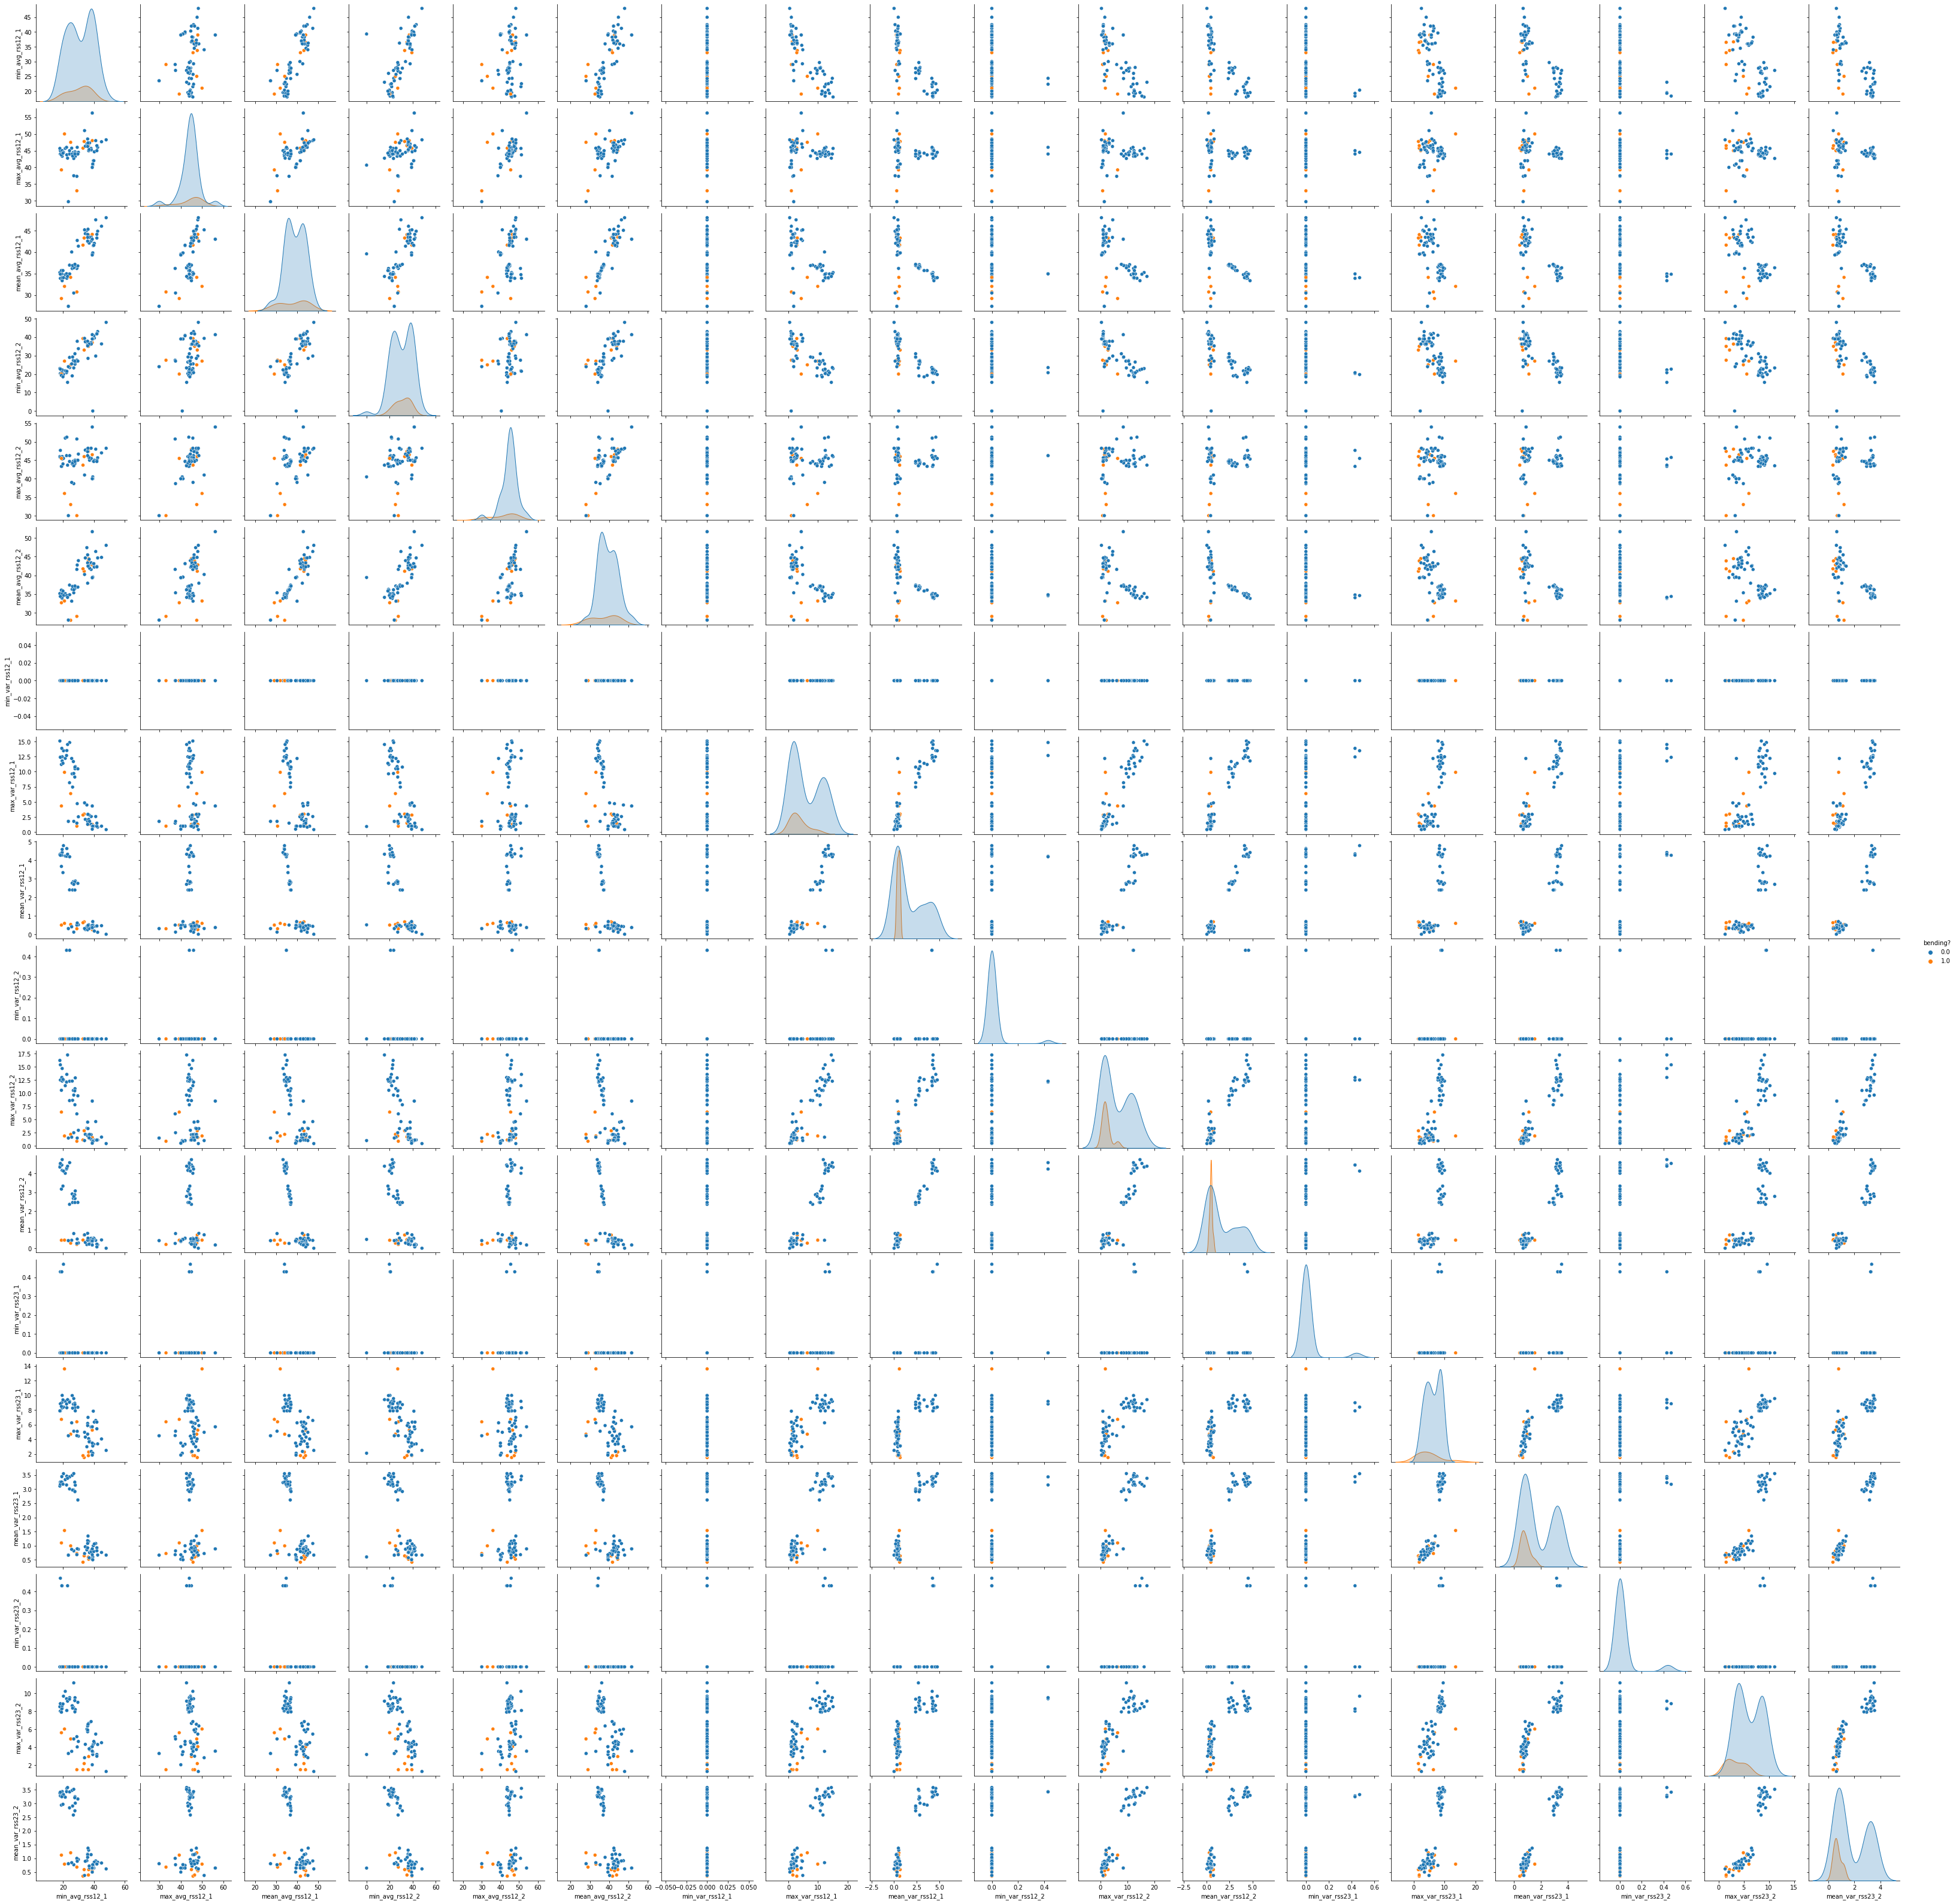

In [16]:
#get used_features of time series 1,2,12
final_12col = {}
final_name_list = []
for i in feature_df_12col.columns.tolist():
    if ('bending'in i) or ('avg_rss12' in i) or ('var_rss12' in i)or('ar_rss23' in i):
        final_12col[i] = feature_df_12col[i]
for key,col in final_12col.items():
    final_name_list.append(key)
final_12col_used = pd.DataFrame.from_dict(final_12col, orient='index')
final_12col_used = final_12col_used.T

sns.pairplot(final_12col_used, hue = 'bending?')

Do you see any considerable difference in the results with those of 1(d)i？
I did not see any considerable difference in the results with those of 1(d)i.

### iii. Logistic Regression
Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance.

#### Data process

In [17]:
#from itertools import product
#function to break each time series into num pieces
def break_cols (df,num):
    piece_list = {}
    piece = int(df.shape[0]/num)
    for (i,j) in product(df.columns.tolist(),range(1,num+1)):
        #print((i,j))
        j_str = str(j)
        piece_list[i+'_'+j_str]=list(df[i][(piece*(j-1)):(piece*j)])
    df_=pd.DataFrame() 
    for list_key, datalist in piece_list.items():
        df_[list_key]=datalist
    return df_      
    

In [18]:
break_cols(train['standing_dataset4'],7)

,avg_rss12_1,avg_rss12_2,avg_rss12_3,avg_rss12_4,avg_rss12_5,avg_rss12_6,avg_rss12_7,var_rss12_1,var_rss12_2,var_rss12_3,...,avg_rss23_5,avg_rss23_6,avg_rss23_7,var_rss23_1,var_rss23_2,var_rss23_3,var_rss23_4,var_rss23_5,var_rss23_6,var_rss23_7
0,41.50,41.50,39.75,42.75,45.00,45.00,45.0,0.50,0.50,0.83,...,15.00,7.50,12.50,0.47,0.50,1.09,0.00,0.00,0.50,1.50
1,41.50,40.67,40.33,43.75,45.00,45.00,45.0,0.50,0.94,0.47,...,15.00,6.67,13.00,0.43,0.83,0.82,0.00,0.71,1.25,1.00
2,41.50,41.00,41.67,43.75,45.00,45.00,45.0,0.50,0.71,0.47,...,15.00,4.67,13.00,0.43,1.30,1.22,0.43,0.71,1.25,1.00
3,41.67,41.25,42.50,43.67,45.00,45.00,45.0,0.47,0.83,0.50,...,15.25,4.67,12.75,0.50,0.43,0.71,1.41,0.83,0.94,0.83
4,41.50,41.50,42.00,43.75,45.00,45.00,45.0,0.50,0.50,0.00,...,15.50,6.33,13.00,1.12,1.00,0.43,1.12,0.87,0.47,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,40.75,36.75,43.25,45.00,43.50,43.67,45.0,0.83,1.30,0.83,...,8.75,12.00,11.67,0.83,3.09,1.12,0.43,0.43,0.00,1.25
64,41.50,36.00,43.00,45.00,42.00,44.33,45.0,0.50,0.00,1.00,...,4.50,11.25,9.75,0.47,1.25,0.83,0.43,2.69,0.83,1.30
65,41.50,37.75,42.25,45.00,41.50,45.00,45.0,0.50,0.83,0.43,...,4.25,10.75,11.00,0.43,3.57,1.63,0.00,1.30,0.83,1.00
66,41.50,40.00,42.00,45.00,41.75,45.00,45.0,0.50,0.71,0.00,...,5.67,11.75,13.50,1.30,0.83,2.59,0.43,0.47,0.43,1.50


In [19]:
total_dataset_train = {}
for l in range(1,21):
    temp = dict()
    for key, dataset in train.items():
        temp [key] = break_cols(dataset,l)
        total_dataset_train[l] = temp

In [20]:
#get features 
def get_features (l_dict):
    feature_dict_new = {}
    
    feature_list_key = list(l_dict.keys())[1]
    dataset_col_new = list(l_dict[feature_list_key].columns)
    #dataset_col_new = list(dataset.columns)
    for key, dataset in l_dict.items():
        feature_list_new = [key]
        #dataset_col_new = list(dataset.columns)
        for i in dataset_col_new:
            #column = dataset.loc[:,i]
            column = dataset[i]
            feature_list_new.append (column.min())
            feature_list_new.append (column.max())
            feature_list_new.append (column.mean())
            #feature_list.append (column.median())
            #feature_list.append (column.std())
            #feature_list.append (column.quantile(0.25))
            #feature_list.append (column.quantile(0.75))
            
        feature_dict_new[key]= feature_list_new
        print (feature_list)
        
        #header 
    name_list_new= ['key']
    for i in dataset_col_new:
        name_list_new.append ('min_'+i)
        name_list_new.append ('max_'+i)
        name_list_new.append ('mean_'+i)
        #name_list_12col.append ('median_'+i)
        #name_list_12col.append ('standard deviation_'+i)
        #name_list_12col.append ('1st quart_'+i)
         #name_list_12col.append ('3rd quart_'+i)
            
    print (len(name_list_new))
    

    features_df_new = pd.DataFrame.from_dict(feature_dict_new, orient='index', columns = name_list_new)

    instance_ = []
    for j in range(1,70):
        instance_.append(str(j))
    features_df_new.insert(0,'instance',instance_)

    features_df_new.set_index(['instance'], inplace=True)
    
    
    return features_df_new

In [65]:
feature_dict_train = {}

for l, l_dict in total_dataset_train.items():
    feature_dict_train[l] = get_features (l_dict)
    

In [22]:
# add feature x
for l, feature_set in feature_dict_train.items():
    y_list_l = []
    for key in feature_set['key']:
        if 'bending' in key:
            y_list_l.append(1)
        else:
            y_list_l.append(0)

    feature_set.insert(feature_set.shape[1],'bending?', y_list_l)
for l, feature_set in feature_dict_train.items():
    feature_set.drop('key',axis=1,inplace = True)


In [23]:
feature_dict_train[1]

,min_avg_rss12_1,max_avg_rss12_1,mean_avg_rss12_1,min_var_rss12_1,max_var_rss12_1,mean_var_rss12_1,min_avg_rss13_1,max_avg_rss13_1,mean_avg_rss13_1,min_var_rss13_1,max_var_rss13_1,mean_var_rss13_1,min_avg_rss23_1,max_avg_rss23_1,mean_avg_rss23_1,min_var_rss23_1,max_var_rss23_1,mean_var_rss23_1,bending?
instance,,,,,,,,,,,,,,,,,,,
1,36.25,48.00,43.969125,0.0,1.50,0.413125,1.50,26.33,15.868021,0.0,5.17,0.666354,11.33,30.75,22.103750,0.0,2.96,0.555312,1
2,37.00,48.00,43.454958,0.0,1.58,0.378083,5.75,27.00,15.793333,0.0,10.03,0.849354,8.00,33.50,23.034792,0.0,5.26,0.679646,1
3,33.00,47.75,42.179812,0.0,3.00,0.696042,8.50,30.00,22.183625,0.0,5.15,0.989917,20.00,38.67,33.493917,0.0,2.18,0.613521,1
4,33.00,45.75,41.678063,0.0,2.83,0.535979,3.00,28.25,19.006563,0.0,6.42,0.841875,23.67,37.50,29.857083,0.0,1.79,0.383292,1
5,35.00,47.40,43.954500,0.0,1.70,0.426250,6.50,29.75,22.122354,0.0,4.44,0.497312,29.00,38.50,35.588458,0.0,1.79,0.493292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,18.50,44.25,35.752354,0.0,12.60,3.328104,5.00,27.00,16.055021,0.0,9.46,2.871125,4.00,24.33,16.001271,0.0,9.39,3.069667,0
66,24.25,45.00,37.177042,0.0,8.58,2.374208,5.50,26.75,16.531083,0.0,8.05,2.910604,7.00,25.50,19.607250,0.0,9.34,2.921729,0
67,23.33,43.50,36.244083,0.0,9.71,2.736021,7.00,28.50,18.435708,0.0,9.78,3.129792,7.67,27.00,18.497146,0.0,11.15,3.530500,0


In [24]:
#split xtrain / y train
#x_train = {}
#y_train = {}

#for l, feature_set in feature_dict_train.items():
 #   x_train[l] = feature_set.iloc[:,:-1]
 #   y_train[l] = feature_set.iloc[:,-1]
 #   
    

#### Logistic Regression

Wrong way: k_fold cross validation
right way: stratified cross validation
reason: the dataset is very imbalace: y=1 <<y=0, so k-fold might have several validation set has no y=1 case. 


In [25]:
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py


x_train = {}
y_train = {}
all_score_dict = {}
ok_feature_dict = {}

for l, feature_set in feature_dict_train.items():
    x_train[l] = feature_set.iloc[:,:-1]
    y_train[l] = feature_set.iloc[:,-1]

    

    log_reg=LogisticRegression()
    selector=RFECV(estimator = log_reg,cv=StratifiedKFold(5),scoring='accuracy')
    selector.fit(x_train[l],y_train[l])
    #selector_score = selector.score(x_train[l],y_train[l])
    selector_score = selector.grid_scores_[selector.n_features_ - 1]
    
    support = selector.support_
    ok_list = []
    #for col,j in zip(range(x_train[l].shape[1]),support):
    for j, column in enumerate(x_train[l].columns):
        if selector.support_[j] == True:
            ok_list.append(column)
    ok_feature_dict[l]= ok_list
    all_score_dict[l] = selector_score
    
all_score_dict

{1: 0.9571428571428571,
 2: 0.9428571428571428,
 3: 0.9571428571428571,
 4: 0.9714285714285715,
 5: 0.9571428571428573,
 6: 0.9571428571428573,
 7: 0.9571428571428571,
 8: 0.9428571428571428,
 9: 0.9428571428571428,
 10: 0.9571428571428571,
 11: 0.9571428571428571,
 12: 0.9571428571428573,
 13: 0.9714285714285715,
 14: 0.9571428571428571,
 15: 0.9428571428571428,
 16: 0.9571428571428571,
 17: 0.9571428571428573,
 18: 0.9714285714285715,
 19: 0.9571428571428573,
 20: 0.9571428571428573}

#### Optimal l

In [26]:
score_max=0
k=0
for l, score in all_score_dict.items():
    if score>score_max:
        score_max = score
        optimal_l=l
optimal_l


4

#### best feature

In [27]:
best_feature = ok_feature_dict[optimal_l]
best_feature


['mean_avg_rss23_1']

### iv  confusion matrix, ROC and AUC

In [28]:
def get_features_test (l_dict):
    feature_dict_new = {}
    
    feature_list_key = list(l_dict.keys())[1]
    dataset_col_new = list(l_dict[feature_list_key].columns)
    #dataset_col_new = list(dataset.columns)
    for key, dataset in l_dict.items():
        feature_list_new = [key]
        #dataset_col_new = list(dataset.columns)
        for i in dataset_col_new:
            #column = dataset.loc[:,i]
            column = dataset[i]
            feature_list_new.append (column.min())
            feature_list_new.append (column.max())
            feature_list_new.append (column.mean())
            #feature_list.append (column.median())
            #feature_list.append (column.std())
            #feature_list.append (column.quantile(0.25))
            #feature_list.append (column.quantile(0.75))
            
        feature_dict_new[key]= feature_list_new
        #print (feature_list)
        
        #header 
    name_list_new= ['key']
    for i in dataset_col_new:
        name_list_new.append ('min_'+i)
        name_list_new.append ('max_'+i)
        name_list_new.append ('mean_'+i)
        #name_list_12col.append ('median_'+i)
        #name_list_12col.append ('standard deviation_'+i)
        #name_list_12col.append ('1st quart_'+i)
         #name_list_12col.append ('3rd quart_'+i)
            
    

    features_df_new = pd.DataFrame.from_dict(feature_dict_new, orient='index', columns = name_list_new)

    instance_ = []
    for j in range(1,20):
        instance_.append(str(j))
    features_df_new.insert(0,'instance',instance_)

    features_df_new.set_index(['instance'], inplace=True)
    
    
    return features_df_new

In [29]:
test_ = {}
for l in range(1,21):
    temp = dict()
    for key, dataset in test.items():
        temp [key] = break_cols(dataset,l)
        test_[l] = temp
feature_dict_test = {}
for l, l_dict in test_.items():
    feature_dict_test[l] = get_features_test (l_dict)
#feature_dict_test[1]

In [30]:
for l, feature_set in feature_dict_test.items():
    y_list_l2=[]
    for key in feature_set['key']:
        if 'bending' in key:
            y_list_l2.append(1)
        else:
            y_list_l2.append(0)
    feature_set.insert(feature_set.shape[1],'bending?',y_list_l2)
    
for l, feature_set in feature_dict_test.items():
    feature_set.drop('key',axis=1,inplace=True)

In [31]:
x_test = {}
y_test = {}

for l, feature_set in feature_dict_test.items():
    x_test[l] = feature_set.iloc[:,0:-1]
    y_test[l] = feature_set.iloc[:,-1]

#### Regression confusion matrix, and report result roc

the parameters are
[[0.97760808]]
the pvalues are
[1.08919196e-17]
the intercept is
[-19.67270822]
confusion matrix
[[59  1]
 [ 2  7]]


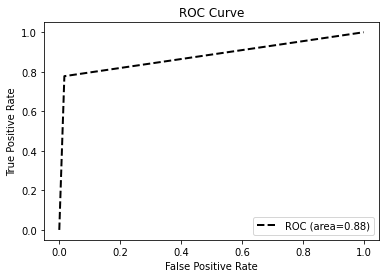

In [32]:
#https://blog.csdn.net/hesongzefairy/article/details/104302499
from sklearn.feature_selection import chi2
x_train_best = x_train[optimal_l][best_feature]
y_train_best = y_train[optimal_l]



logi=LogisticRegression()
logi.fit(x_train_best,y_train_best)
prediction = logi.predict(x_train_best)
beta = logi.coef_
intercept = logi.intercept_

X,y=x_train_best, y_train_best
score,pvalues = chi2(X,y)



print('the parameters are')
print(beta)

print('the pvalues are')
print (pvalues)

print('the intercept is')
print(intercept)

print('confusion matrix') 
print (confusion_matrix(y_train_best,prediction))
fpr, tpr, thersholds = roc_curve(y_train_best, prediction)

roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,'k--',label = 'ROC (area={0:.2f})'.format(roc_auc),lw=2)

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
#logit_model = sm.Logit(y_train_best,x_train_best)
#result = logit_model.fit()
#print (result.summary())

### v.Test the classifier on the test set

In [34]:
logi=LogisticRegression()
logi.fit(x_train_best,y_train_best)
prediction = logi.predict(x_test[optimal_l][best_feature])
print (logi.score(x_test[optimal_l][best_feature],y_test[optimal_l]))
confusion_matrix(y_test[optimal_l],prediction)

0.9473684210526315


array([[15,  0],
       [ 1,  3]])

cross-validation accuracy:0.9714285714285715
the accuracy on the test set: 0.9473684210526315
accuracy on the test set is smaller

### vi.  Instability?

Yes, the classes seem to be well-separated to cause instability in calculating logistic regression parameters, as shown on the scatterplot.

### vii. handle the imbalanced class

In [35]:
#https://elitedatascience.com/imbalanced-classes

In [36]:
from sklearn.utils import resample

train = x_train_best
train['bending'] = y_train_best
print (train)
ben = train[train.bending==1]
not_ben = train[train.bending==0]

df_majority_downsampled = resample(ben,replace=True,n_samples=not_ben.shape[0],random_state=13)
df_downsampled = pd.concat([not_ben,df_majority_downsampled])

x_train = df_downsampled.iloc[:,0:-1]

y_train = df_downsampled.iloc[:,-1]



for i in (x_train.columns.tolist()):
    if 'bend' in i:
        x_train.drop(columns=i,inplace=True)
        #k=x_train.columns.get_loc(i)
        #x_train.drop([k],axis=1,inplace=True)

          mean_avg_rss23_1  bending
instance                           
1                23.592500        1
2                24.503500        1
3                36.624000        1
4                29.118917        1
5                35.990333        1
...                    ...      ...
65               16.627000        0
66               19.254500        0
67               18.761500        0
68               15.866583        0
69               16.296500        0

[69 rows x 2 columns]


the parameters are
[[1.41357401]]
the pvalues are
[3.62747463e-52]
the intercept is
[-25.7874976]
confusion matrix
[[57  3]
 [ 4 56]]


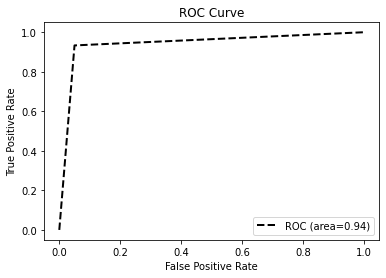

In [38]:
x_train_best = x_train
y_train_best = y_train



logi=LogisticRegression()
logi.fit(x_train_best,y_train_best)
prediction = logi.predict(x_train_best)
beta = logi.coef_
intercept = logi.intercept_

X,y=x_train_best, y_train_best
score,pvalues = chi2(X,y)



print('the parameters are')
print(beta)

print('the pvalues are')
print (pvalues)

print('the intercept is')
print(intercept)

print('confusion matrix') 
print (confusion_matrix(y_train_best,prediction))
fpr, tpr, thersholds = roc_curve(y_train_best, prediction)

roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,'k--',label = 'ROC (area={0:.2f})'.format(roc_auc),lw=2)

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## e. Binary Classification Using L1-penalized logistic regression

#### i. repeat diii

In [39]:
test = dict()
train = dict()

#test_set = 
for key, dataset in df.items():
    if ((key == 'bending1_dataset1') or (key =='bending1_dataset2') or (key=='bending2_dataset1') or (key=='bending2_dataset2')\
               or (key=='walking_dataset1') or (key=='walking_dataset2') or (key=='walking_dataset3')\
               or (key=='standing_dataset1') or (key=='standing_dataset2') or (key=='standing_dataset3')\
               or (key=='sitting_dataset1') or (key=='sitting_dataset2')or (key=='sitting_dataset3')\
               or (key=='lying_dataset1') or (key=='lying_dataset2' )or (key=='lying_dataset3')\
               or (key=='cycling_dataset1' )or (key=='cycling_dataset2')or (key=='cycling_dataset3')):
        test[key] = dataset
    else:
        train[key] = dataset

In [40]:
total_dataset_train = {}
for l in range(1,21):
    temp = dict()
    for key, dataset in train.items():
        temp [key] = break_cols(dataset,l)
        total_dataset_train[l] = temp

In [64]:
feature_dict_train = {}

for l, l_dict in total_dataset_train.items():
    feature_dict_train[l] = get_features (l_dict)


In [43]:
x_train={}
y_train={}
for l, feature_set in feature_dict_train.items():
    y_list_l = []
    for key in feature_set['key']:
        if 'bending' in key:
            y_list_l.append(1)
        else:
            y_list_l.append(0)

    feature_set.insert(feature_set.shape[1],'bending?', y_list_l)

In [44]:
for l, feature_set in feature_dict_train.items():
    feature_set.drop('key',axis=1,inplace = True)

for l, feature_set in feature_dict_train.items():
    x_train[l] = feature_set.iloc[:,:-1]
    y_train[l] = feature_set.iloc[:,-1]


In [45]:
#normalized_df=(df-df.mean())/df.std()
x_train_scaled = {}
for l,df in x_train.items():
    col_name = list(df.columns)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    k = pd.DataFrame(x_scaled,columns=col_name)
    x_train_scaled[l]=k
    

x_train_scaled[2]

,min_avg_rss12_1,max_avg_rss12_1,mean_avg_rss12_1,min_avg_rss12_2,max_avg_rss12_2,mean_avg_rss12_2,min_var_rss12_1,max_var_rss12_1,mean_var_rss12_1,min_var_rss12_2,...,mean_avg_rss23_1,min_avg_rss23_2,max_avg_rss23_2,mean_avg_rss23_2,min_var_rss23_1,max_var_rss23_1,mean_var_rss23_1,min_var_rss23_2,max_var_rss23_2,mean_var_rss23_2
0,0.622333,0.575472,0.781180,0.755208,0.750000,0.695458,0.0,0.059386,0.078902,0.0,...,0.571553,0.474138,0.586777,0.609363,0.0,0.062086,0.033814,0.0,0.168528,0.073754
1,0.700000,0.688679,0.811754,0.770833,0.687500,0.625297,0.0,0.059386,0.051973,0.0,...,0.598951,0.275862,0.586777,0.638472,0.0,0.308775,0.126678,0.0,0.280203,0.060791
2,0.525000,0.679245,0.771131,0.687500,0.666667,0.552897,0.0,0.175427,0.140584,0.0,...,0.991675,0.689655,1.000000,0.882290,0.0,0.000000,0.070917,0.0,0.089340,0.073857
3,0.500000,0.603774,0.690789,0.817708,0.569583,0.580559,0.0,0.163823,0.130073,0.0,...,0.809359,0.896552,0.917355,0.842333,0.0,0.021523,0.000000,0.0,0.020305,0.000000
4,0.616667,0.632075,0.808852,0.729167,0.725000,0.670077,0.0,0.073038,0.079399,0.0,...,1.000000,1.000000,0.991736,1.000000,0.0,0.021523,0.057266,0.0,0.020305,0.012641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.066667,0.547170,0.403427,0.385417,0.583333,0.330120,0.0,0.748123,0.695576,0.0,...,0.373607,0.241379,0.531570,0.436550,0.0,0.650662,0.880034,0.0,0.762437,0.810881
65,0.208333,0.575472,0.464594,0.604167,0.611250,0.397244,0.0,0.529010,0.500550,0.0,...,0.487051,0.405172,0.537190,0.542116,0.0,0.624172,0.826643,0.0,0.816244,0.770999
66,0.300000,0.487547,0.434958,0.486042,0.562500,0.344196,0.0,0.633447,0.563200,0.0,...,0.448351,0.275862,0.608926,0.513317,0.0,0.665563,1.000000,0.0,1.000000,0.980007
67,0.275000,0.515094,0.460290,0.609375,0.593750,0.382427,0.0,0.479863,0.499416,0.0,...,0.372549,0.068966,0.429752,0.436859,0.0,0.557119,0.813672,0.0,0.714721,0.791546


In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
score_d = {}
train_error = {}
test_error = {}

for i in range(1,21):
    clf=LogisticRegressionCV(cv=5,random_state=0,solver ='liblinear',penalty='l1').fit(x_train_scaled[i],y_train[i])
    train_error_ =1-clf.score(x_train_scaled[i],y_train[i])
    test_error_ = 1-clf.score(x_test[i],y_test[i])
    score = clf.score(x_test[i],y_test[i])
    score_d[i]=score
    train_error[i]=train_error_
    test_error [i]=test_error_
    

print(score_d)


{1: 0.3157894736842105, 2: 0.5789473684210527, 3: 0.3157894736842105, 4: 0.631578947368421, 5: 0.631578947368421, 6: 0.47368421052631576, 7: 0.6842105263157895, 8: 0.5789473684210527, 9: 0.9473684210526315, 10: 1.0, 11: 0.9473684210526315, 12: 1.0, 13: 0.9473684210526315, 14: 0.9473684210526315, 15: 0.9473684210526315, 16: 1.0, 17: 0.9473684210526315, 18: 0.9473684210526315, 19: 0.9473684210526315, 20: 0.9473684210526315}


#### optimal_l

In [47]:
optimal_l=0
best_score = 0
for l,score in score_d.items():
    if score>best_score:
        best_score=score
        optimal_l = l
print(optimal_l)

10


#### ii. Compare the L1-penalized with variable selection using p-values.

Better: L1-penalized
Easier: L1_penalized

### f. Multi-class Classification (The Realistic Case)

In [48]:
path = '../data/AReM/'

folders = os.listdir(path)
folders = folders [1:]
df = dict()
#print (type(df_index))
for folder in folders:
    folder_path = path+folder+'/'
    files = os.listdir (folder_path)
    for file in files:
        file_path = folder_path + file
        #print (file_path)
        file_name = folder +'_' +file [:-4]
        #print (file_name)
        df [file_name] = pd.read_csv(file_path, delimiter =',', skiprows = 4, usecols = [0,1,2,3,4,5,6])
        #print(df[file_name].isnull().sum())
for key, dataset in df.items():
    dataset.set_index(['# Columns: time'], inplace=True)
df ['standing_dataset6']

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
# Columns: time,,,,,,
0,44.50,0.87,11.25,5.54,12.50,2.96
250,42.50,0.87,18.00,0.71,14.25,3.83
500,39.00,2.12,16.00,1.58,13.75,2.38
750,36.25,0.43,18.67,0.47,9.50,0.50
1000,39.25,1.48,16.25,2.68,5.67,2.87
...,...,...,...,...,...,...
118750,45.00,0.00,21.00,0.00,13.00,0.82
119000,45.00,0.00,21.00,0.00,12.25,0.43
119250,45.00,0.00,21.00,0.00,12.50,0.87


In [49]:
#from itertools import product
#function to break each time series into num pieces
def break_cols (df,num):
    piece_list = {}
    piece = int(df.shape[0]/num)
    for (i,j) in product(df.columns.tolist(),range(1,num+1)):
        #print((i,j))
        j_str = str(j)
        piece_list[i+'_'+j_str]=list(df[i][(piece*(j-1)):(piece*j)])
    df_=pd.DataFrame() 
    for list_key, datalist in piece_list.items():
        df_[list_key]=datalist
    return df_      
    

In [50]:
#get features 
def get_features (l_dict):
    feature_dict_new = {}
    
    feature_list_key = list(l_dict.keys())[1]
    dataset_col_new = list(l_dict[feature_list_key].columns)
    #dataset_col_new = list(dataset.columns)
    for key, dataset in l_dict.items():
        feature_list_new = [key]
        #dataset_col_new = list(dataset.columns)
        for i in dataset_col_new:
            #column = dataset.loc[:,i]
            column = dataset[i]
            feature_list_new.append (column.min())
            feature_list_new.append (column.max())
            feature_list_new.append (column.mean())
            #feature_list.append (column.median())
            #feature_list.append (column.std())
            #feature_list.append (column.quantile(0.25))
            #feature_list.append (column.quantile(0.75))
            
        feature_dict_new[key]= feature_list_new
        
        
        #header 
    name_list_new= ['key']
    for i in dataset_col_new:
        name_list_new.append ('min_'+i)
        name_list_new.append ('max_'+i)
        name_list_new.append ('mean_'+i)
        #name_list_12col.append ('median_'+i)
        #name_list_12col.append ('standard deviation_'+i)
        #name_list_12col.append ('1st quart_'+i)
         #name_list_12col.append ('3rd quart_'+i)
            
    

    features_df_new = pd.DataFrame.from_dict(feature_dict_new, orient='index', columns = name_list_new)

    instance_ = []
    for j in range(1,70):
        instance_.append(str(j))
    features_df_new.insert(0,'instance',instance_)

    features_df_new.set_index(['instance'], inplace=True)
    
    
    return features_df_new

In [51]:
test = dict()
train = dict()

#test_set = 
for key, dataset in df.items():
    if ((key == 'bending1_dataset1') or (key =='bending1_dataset2') or (key=='bending2_dataset1') or (key=='bending2_dataset2')\
               or (key=='walking_dataset1') or (key=='walking_dataset2') or (key=='walking_dataset3')\
               or (key=='standing_dataset1') or (key=='standing_dataset2') or (key=='standing_dataset3')\
               or (key=='sitting_dataset1') or (key=='sitting_dataset2')or (key=='sitting_dataset3')\
               or (key=='lying_dataset1') or (key=='lying_dataset2' )or (key=='lying_dataset3')\
               or (key=='cycling_dataset1' )or (key=='cycling_dataset2')or (key=='cycling_dataset3')):
        test[key] = dataset
    else:
        train[key] = dataset
        
total_dataset_train = {}
for l in range(1,21):
    temp = dict()
    for key, dataset in train.items():
        temp [key] = break_cols(dataset,l)
        total_dataset_train[l] = temp

feature_dict_train = {}

for l, l_dict in total_dataset_train.items():
    feature_dict_train[l] = get_features (l_dict)

x_train={}
y_train={}
for l, feature_set in feature_dict_train.items():
    y_list_l = []
    for key in feature_set['key']:
        if 'bending' in key:
            y_list_l.append(0)
        elif 'cycling' in key:
            y_list_l.append(1)
        elif 'lying' in key:
            y_list_l.append(2)
        elif 'sitting' in key:
            y_list_l.append(3)
        elif 'standing' in key:
            y_list_l.append(4)
        else:
            y_list_l.append(5)

    feature_set.insert(feature_set.shape[1],'result', y_list_l)

for l, feature_set in feature_dict_train.items():
    feature_set.drop('key',axis=1,inplace = True)

for l, feature_set in feature_dict_train.items():
    x_train[l] = feature_set.iloc[:,:-1]
    y_train[l] = feature_set.iloc[:,-1]
    
#normalized_df=(df-df.mean())/df.std()
x_train_scaled = {}
for l,df in x_train.items():
    col_name = list(df.columns)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    k = pd.DataFrame(x_scaled,columns=col_name)
    x_train_scaled[l]=k

In [52]:
def get_features_test (l_dict):
    feature_dict_new = {}
    
    feature_list_key = list(l_dict.keys())[1]
    dataset_col_new = list(l_dict[feature_list_key].columns)
    #dataset_col_new = list(dataset.columns)
    for key, dataset in l_dict.items():
        feature_list_new = [key]
        #dataset_col_new = list(dataset.columns)
        for i in dataset_col_new:
            #column = dataset.loc[:,i]
            column = dataset[i]
            feature_list_new.append (column.min())
            feature_list_new.append (column.max())
            feature_list_new.append (column.mean())
            #feature_list.append (column.median())
            #feature_list.append (column.std())
            #feature_list.append (column.quantile(0.25))
            #feature_list.append (column.quantile(0.75))
            
        feature_dict_new[key]= feature_list_new
        #print (feature_list)
        
        #header 
    name_list_new= ['key']
    for i in dataset_col_new:
        name_list_new.append ('min_'+i)
        name_list_new.append ('max_'+i)
        name_list_new.append ('mean_'+i)
        #name_list_12col.append ('median_'+i)
        #name_list_12col.append ('standard deviation_'+i)
        #name_list_12col.append ('1st quart_'+i)
         #name_list_12col.append ('3rd quart_'+i)
            
    

    features_df_new = pd.DataFrame.from_dict(feature_dict_new, orient='index', columns = name_list_new)

    instance_ = []
    for j in range(1,20):
        instance_.append(str(j))
    features_df_new.insert(0,'instance',instance_)

    features_df_new.set_index(['instance'], inplace=True)
    
    
    return features_df_new

In [53]:
total_dataset_test= {}
for l in range(1,21):
    temp = dict()
    for key, dataset in test.items():
        temp [key] = break_cols(dataset,l)
        total_dataset_test[l] = temp

feature_dict_test = {}

for l, l_dict in total_dataset_test.items():
    feature_dict_test[l] = get_features_test (l_dict)

x_test={}
y_test={}
for l, feature_set in feature_dict_test.items():
    y_list_l = []
    for key in feature_set['key']:
        if 'bending' in key:
            y_list_l.append(0)
        elif 'cycling' in key:
            y_list_l.append(1)
        elif 'lying' in key:
            y_list_l.append(2)
        elif 'sitting' in key:
            y_list_l.append(3)
        elif 'standing' in key:
            y_list_l.append(4)
        else:
            y_list_l.append(5)

    feature_set.insert(feature_set.shape[1],'result', y_list_l)

for l, feature_set in feature_dict_test.items():
    feature_set.drop('key',axis=1,inplace = True)

for l, feature_set in feature_dict_test.items():
    x_test[l] = feature_set.iloc[:,:-1]
    y_test[l] = feature_set.iloc[:,-1]
    
#normalized_df=(df-df.mean())/df.std()
x_test_scaled = {}
for l,df in x_test.items():
    col_name = list(df.columns)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    k = pd.DataFrame(x_scaled,columns=col_name)
    x_test_scaled[l]=k
    

#### multi classification

In [54]:
train_error = {}
test_error = {}
score_d = {}

for i in range(1,21):
    clf=LogisticRegressionCV(cv=5,random_state=0,solver ='liblinear',penalty='l1').fit(x_train_scaled[i],y_train[i])
    train_error_ =1-clf.score(x_train_scaled[i],y_train[i])
    test_error_ = 1-clf.score(x_test[i],y_test[i])
    score_ = clf.score(x_test[i],y_test[i])
    train_error[i]=train_error_
    test_error [i]=test_error_
    score_d[i]=score_

print(score)

0.9473684210526315


In [55]:
optimal_l=0
best_score = 0
for l,score in score_d.items():
    if score>best_score:
        best_score=score
        optimal_l = l
print('optimal l : ')
print(optimal_l)

5


In [56]:
clf = LogisticRegression().fit(x_train_scaled[5],y_train[5])
pred=clf.predict(x_test_scaled[5])
print('confusion_matrix')
confusion_matrix(y_test[5],pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3]])

### f.ii Gaussian

In [57]:
score_d = {}
for i in range(1,21):
    clf = GaussianNB()
    clf.fit(x_train_scaled[i],y_train[i])
    score=clf.score
    score = sum(cross_val_score(clf,x_train_scaled[i],y_train[i],cv=5))/5
    score_d[i]=score
score_d

{1: 0.8703296703296702,
 2: 0.856043956043956,
 3: 0.7681318681318682,
 4: 0.7681318681318681,
 5: 0.724175824175824,
 6: 0.7252747252747253,
 7: 0.767032967032967,
 8: 0.7813186813186814,
 9: 0.7087912087912088,
 10: 0.6802197802197802,
 11: 0.6956043956043956,
 12: 0.6516483516483518,
 13: 0.6824175824175824,
 14: 0.6670329670329671,
 15: 0.6087912087912088,
 16: 0.5791208791208791,
 17: 0.5648351648351648,
 18: 0.5659340659340659,
 19: 0.5802197802197802,
 20: 0.5648351648351648}

In [58]:
optimal_l=0
best_score = 0
for l,score in score_d.items():
    if score>best_score:
        best_score=score
        optimal_l = l
print('optimal l : ')
print(optimal_l)

1


In [59]:
clf = GaussianNB().fit(x_train_scaled[optimal_l],y_train[optimal_l])
pred=clf.predict(x_test_scaled[optimal_l])
print('confusion_matrix')
confusion_matrix(y_test[optimal_l],pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 0],
       [2, 0, 0, 1, 0, 0],
       [0, 0, 1, 2, 0, 0],
       [0, 1, 0, 0, 0, 2]])

### f ii Motinomial

In [60]:
score_d = {}
for i in range(1,21):
    clf = MultinomialNB()
    clf.fit(x_train_scaled[i],y_train[i])
    score = cross_val_score(clf,x_train_scaled[i],y_train[i],cv=5)
    score_d[i]=np.mean(score)

print (score_d)

{1: 0.5637362637362637, 2: 0.6527472527472528, 3: 0.6384615384615385, 4: 0.667032967032967, 5: 0.7384615384615385, 6: 0.6956043956043956, 7: 0.7098901098901098, 8: 0.724175824175824, 9: 0.7252747252747251, 10: 0.7384615384615385, 11: 0.6681318681318681, 12: 0.7098901098901098, 13: 0.7395604395604396, 14: 0.6967032967032967, 15: 0.7252747252747253, 16: 0.7538461538461538, 17: 0.7098901098901098, 18: 0.7252747252747253, 19: 0.7098901098901098, 20: 0.7252747252747251}


In [61]:
optimal_l=0
best_score = 0
for l,score in score_d.items():
    if score>best_score:
        best_score=score
        optimal_l = l 
print('optimal l : ')
print(optimal_l)

16


In [62]:
clf = MultinomialNB().fit(x_train_scaled[optimal_l],y_train[optimal_l])
pred=clf.predict(x_test_scaled[optimal_l])

print('confusion_matrix')
confusion_matrix(y_test[optimal_l],pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 3]])

 #### Naive Bayes is better for this question

# ISLR

3.7.4

1. The Cubic regression's RSS is smaller. Cubic regression will try to fit the training data better(which is a overfit in this case) than the linear regression line.
2. The Cubic regression's RSS is bigger. Linear regression's is smaller.because the true relationship is linear, the test error of the linear regression is smaller.
3. The Cubic regression's RSS is smaller. Same reason as a. 
4. We do not know. Because we do not know the true relationship between them, we do not know which RSS is smaller. However, we know that if the relationship is Cubic regression, then the Cubic regression's RSS would be smaller and if the relationship is linear, the linear regression RSS would be smaller.

In [ ]:
Others see attachments